In [8]:
import sys
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import random
%matplotlib inline
import tensorflow as tf
import tensorflow.contrib.learn as tflearn
import tensorflow.contrib.layers as tflayers
from tensorflow.contrib.learn import learn_runner
import tensorflow.contrib.metrics as metrics
import tensorflow.contrib.rnn as rnn

# https://medium.com/mlreview/a-simp
# le-deep-learning-model-for-stock-price-prediction-using-tensorflow-30505541d877


In [9]:
# Import data
data = pd.read_csv('data/bydaym2.csv',index_col='date', parse_dates=True)
data.head()



,stock,open,high,low,close,diff,vol,f,i
date,,,,,,,,,
2018-04-04,AK홀딩스,75300,76800,73800,73800,-1200,33775,8126,-4118
2018-04-03,AK홀딩스,75800,77000,74700,75000,400,78854,-1290,12732
2018-04-02,AK홀딩스,73000,76600,73000,74600,1700,70021,-4866,9029
2018-03-30,AK홀딩스,72200,73700,71900,72900,1000,32633,5100,1566
2018-03-29,AK홀딩스,71200,72000,70400,71900,800,26341,5293,-924


In [10]:
data = data.query('stock=="삼성전자"')
print(data.head())


           stock     open     high      low    close   diff     vol      f  \
date                                                                         
2018-04-04  삼성전자  2408000  2413000  2346000  2346000 -60000  247684 -51588   
2018-04-03  삼성전자  2394000  2407000  2364000  2406000 -21000  255365 -15726   
2018-04-02  삼성전자  2450000  2461000  2425000  2427000 -34000  142313 -25379   
2018-03-30  삼성전자  2454000  2495000  2454000  2461000   9000  155542 -32418   
2018-03-29  삼성전자  2435000  2478000  2416000  2452000  17000  201340 -35331   

                i  
date               
2018-04-04 -50960  
2018-04-03 -21168  
2018-04-02 -13986  
2018-03-30  17369  
2018-03-29   9898  


In [11]:
# query
data_s = data.query('date>=20080403 & date<=20180403')
print(data.head())




           stock     open     high      low    close   diff     vol      f  \
date                                                                         
2018-04-04  삼성전자  2408000  2413000  2346000  2346000 -60000  247684 -51588   
2018-04-03  삼성전자  2394000  2407000  2364000  2406000 -21000  255365 -15726   
2018-04-02  삼성전자  2450000  2461000  2425000  2427000 -34000  142313 -25379   
2018-03-30  삼성전자  2454000  2495000  2454000  2461000   9000  155542 -32418   
2018-03-29  삼성전자  2435000  2478000  2416000  2452000  17000  201340 -35331   

                i  
date               
2018-04-04 -50960  
2018-04-03 -21168  
2018-04-02 -13986  
2018-03-30  17369  
2018-03-29   9898  


In [12]:
# Drop date variable
# data_s = data_s.drop(['stock','date'], 1)
data_s = data_s.drop(['stock','open','high','low','diff','vol','f','i'], 1)


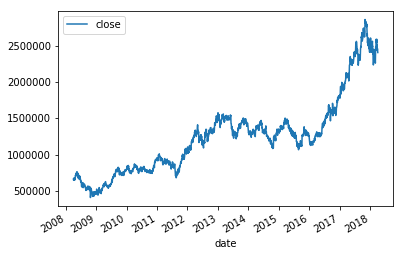

In [13]:

data_s.plot()

In [43]:
from fbprophet import Prophet

df = data_s.reset_index().rename(columns={'date':'ds', 'close':'y'})
df['y'] = np.log(df['y'])
model = Prophet(daily_seasonality=True)


In [45]:
model.fit(df)
future = model.make_future_dataframe(periods=365) #forecasting for 1 year from now.


In [47]:
forecast = model.predict(future)


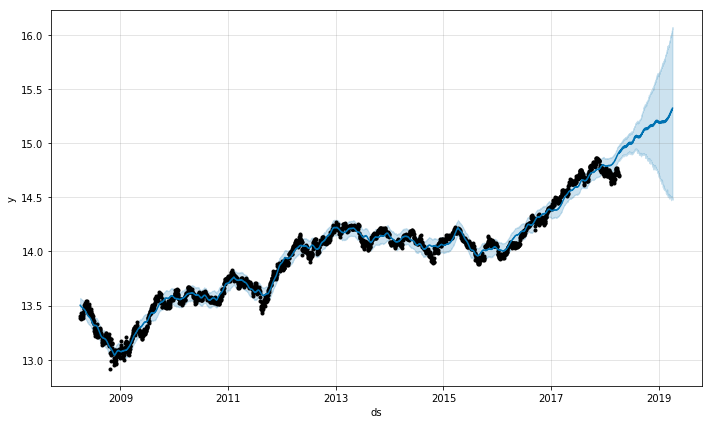

In [49]:

figure=model.plot(forecast)

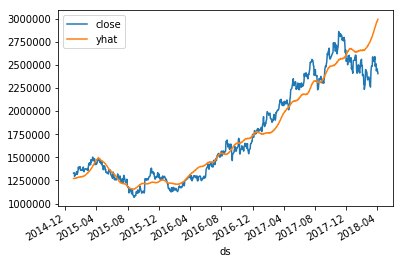

In [ ]:

# df['y_orig'] = df['y'] # to save a copy of the original data..you'll see why shortly. 
# # log-transform y
# df['y'] = np.log(df['y'])

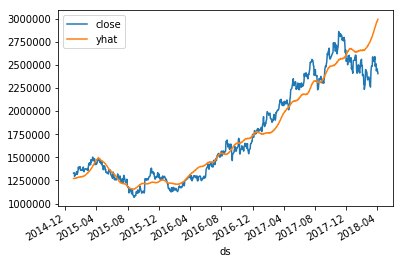

In [50]:
# Last 3 years of Actuals (orange) vs Forecast (blue – listed as yhat)
three_years = forecast.set_index('ds').join(data_s)
three_years = three_years[['close', 'yhat', 'yhat_upper', 'yhat_lower' ]].dropna().tail(800)
three_years['yhat']=np.exp(three_years.yhat)
three_years['yhat_upper']=np.exp(three_years.yhat_upper)
three_years['yhat_lower']=np.exp(three_years.yhat_lower)
three_years[['close', 'yhat']].plot()


In [29]:

three_years_AE = (three_years.yhat - three_years.close)
print(three_years_AE.describe())

count       800.000000
mean      -5449.281018
std      132727.575295
min     -306702.631034
25%      -85556.413068
50%       -8804.577527
75%       59434.638239
max      587269.630594
dtype: float64


In [32]:
# close to 1
from sklearn.metrics import r2_score
r2_score(three_years.close, three_years.yhat)


0.9348939352089566

In [33]:
# MSE, closer to zero is better
from sklearn.metrics import *
mean_squared_error(three_years.close, three_years.yhat)


17624283145.639664

In [34]:

mean_absolute_error(three_years.close, three_years.yhat)

97700.53061881676

Text(0.5,0,'Date')

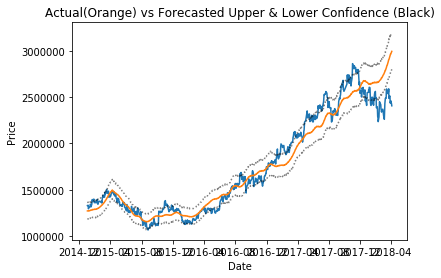

In [51]:

fig, ax1 = plt.subplots()
ax1.plot(three_years.close)
ax1.plot(three_years.yhat)
ax1.plot(three_years.yhat_upper, color='black',  linestyle=':', alpha=0.5)
ax1.plot(three_years.yhat_lower, color='black',  linestyle=':', alpha=0.5)
 
ax1.set_title('Actual(Orange) vs Forecasted Upper & Lower Confidence (Black)')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')

In [61]:

full_df = forecast.set_index('ds').join(data_s)


In [ ]:
full_df['yhat']=np.exp(full_df['yhat'])
 
fig, ax1 = plt.subplots()
ax1.plot(full_df.close)
ax1.plot(full_df.yhat, color='black', linestyle=':')
ax1.fill_between(full_df.index, np.exp(full_df['yhat_upper']), np.exp(full_df['yhat_lower']), alpha=0.5, color='darkgray')
ax1.set_title('삼성전자 Actual(Orange) vs Forecasted (Black) with Confidence Bands')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')
 
L=ax1.legend() #get the legend
L.get_texts()[0].set_text('close Actual') #change the legend text for 1st plot
L.get_texts()[1].set_text('close Forecasted') #change the legend text for 2nd plot


In [54]:
print(full_df['yhat'])

In [55]:

print(np.exp(full_df['yhat']))

ds
2008-04-03    inf
2008-04-04    inf
2008-04-07    inf
2008-04-08    inf
2008-04-10    inf
2008-04-11    inf
2008-04-14    inf
2008-04-15    inf
2008-04-16    inf
2008-04-17    inf
2008-04-18    inf
2008-04-21    inf
2008-04-22    inf
2008-04-23    inf
2008-04-24    inf
2008-04-25    inf
2008-04-28    inf
2008-04-29    inf
2008-04-30    inf
2008-05-02    inf
2008-05-06    inf
2008-05-07    inf
2008-05-08    inf
2008-05-09    inf
2008-05-13    inf
2008-05-14    inf
2008-05-15    inf
2008-05-16    inf
2008-05-19    inf
2008-05-20    inf
             ... 
2019-03-05    inf
2019-03-06    inf
2019-03-07    inf
2019-03-08    inf
2019-03-09    inf
2019-03-10    inf
2019-03-11    inf
2019-03-12    inf
2019-03-13    inf
2019-03-14    inf
2019-03-15    inf
2019-03-16    inf
2019-03-17    inf
2019-03-18    inf
2019-03-19    inf
2019-03-20    inf
2019-03-21    inf
2019-03-22    inf
2019-03-23    inf
2019-03-24    inf
2019-03-25    inf
2019-03-26    inf
2019-03-27    inf
2019-03-28    inf
2019-03

C:\Users\DJA\venv\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [57]:
print(full_df.close)

ds
2008-04-03    662000.0
2008-04-04    650000.0
2008-04-07    650000.0
2008-04-08    646000.0
2008-04-10    656000.0
2008-04-11    680000.0
2008-04-14    678000.0
2008-04-15    658000.0
2008-04-16    651000.0
2008-04-17    661000.0
2008-04-18    665000.0
2008-04-21    674000.0
2008-04-22    675000.0
2008-04-23    653000.0
2008-04-24    661000.0
2008-04-25    690000.0
2008-04-28    716000.0
2008-04-29    710000.0
2008-04-30    711000.0
2008-05-02    731000.0
2008-05-06    745000.0
2008-05-07    741000.0
2008-05-08    728000.0
2008-05-09    709000.0
2008-05-13    735000.0
2008-05-14    738000.0
2008-05-15    764000.0
2008-05-16    760000.0
2008-05-19    728000.0
2008-05-20    713000.0
                ...   
2019-03-05         NaN
2019-03-06         NaN
2019-03-07         NaN
2019-03-08         NaN
2019-03-09         NaN
2019-03-10         NaN
2019-03-11         NaN
2019-03-12         NaN
2019-03-13         NaN
2019-03-14         NaN
2019-03-15         NaN
2019-03-16         NaN
2019-03-

In [62]:

print(full_df)


                trend  trend_lower  trend_upper  yhat_lower  yhat_upper  \
ds                                                                        
2008-04-03  13.412170    13.412170    13.412170   13.435490   13.567646   
2008-04-04  13.410263    13.410263    13.410263   13.430407   13.571135   
2008-04-07  13.404540    13.404540    13.404540   13.427990   13.564609   
2008-04-08  13.402632    13.402632    13.402632   13.431883   13.562909   
2008-04-10  13.398817    13.398817    13.398817   13.424755   13.562314   
2008-04-11  13.396909    13.396909    13.396909   13.423727   13.559163   
2008-04-14  13.391186    13.391186    13.391186   13.414112   13.557365   
2008-04-15  13.389279    13.389279    13.389279   13.415629   13.554707   
2008-04-16  13.387371    13.387371    13.387371   13.415521   13.554412   
2008-04-17  13.385464    13.385464    13.385464   13.413570   13.551488   
2008-04-18  13.383556    13.383556    13.383556   13.408691   13.551733   
2008-04-21  13.377833    

0.04945215


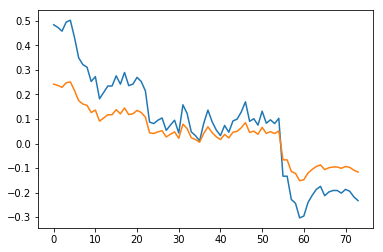

0.04945215


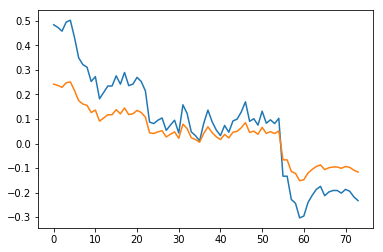

0.04945215


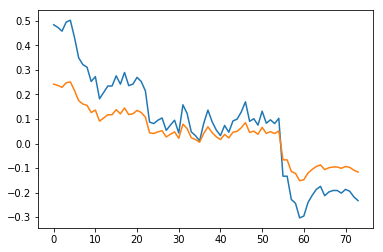

In [196]:
#laceholders, variables, initializers, cost functions and optimizers of the network, 
# the model needs to be trained

#  sampled data batch of X flows through the network until it reaches the output layer. There, TensorFlow compares 
# the models predictions against the actual observed targets Y in the current batch.

# Make Session
net = tf.Session()
# Run initializer
net.run(tf.global_variables_initializer())

# Setup interactive plot
plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
line2, = ax1.plot(y_test*0.5)
# plt.show()

# Number of epochs and batch size
epochs = 1000
batch_size = 512

for e in range(epochs):

    # Shuffle training data
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]

    # Minibatch training
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        # Run optimizer with batch
        net.run(opt, feed_dict={X: batch_x, Y: batch_y})

        # Show progress
        if np.mod(i, 5) == 0:
            # Prediction
            pred = net.run(out, feed_dict={X: X_test})
            line2.set_ydata(pred)
            plt.title('Epoch ' + str(e) + ', Batch ' + str(i))
            file_name = 'img/epoch_' + str(e) + '_batch_' + str(i) + '.jpg'
            plt.savefig(file_name)
            plt.pause(0.01)
# Print final MSE after Training
mse_final = net.run(mse, feed_dict={X: X_test, Y: y_test})
print(mse_final)